<a href="https://colab.research.google.com/github/Rohith18744/2025-training/blob/main/Magic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
train = pd.DataFrame()
valid = pd.DataFrame()
test = pd.DataFrame()

In [3]:
from google.colab import drive


drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/magic04.data'

cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3long","fM3Alpha","fDist","class"]
df= pd.read_csv(file_path,names=cols)


print(df.head())

           fLength  fWidth   fSize   fConc    fConc1    fAsym  fM3long  \
28.7967    16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
31.6036    11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
23.8172     9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
75.1362    30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

          fM3Alpha     fDist class  
28.7967    40.0920   81.8828     g  
31.6036     6.3609  205.2610     g  
162.0520   76.9600  256.7880     g  
23.8172    10.4490  116.7370     g  
75.1362     4.6480  356.4620     g  


In [5]:
df["class"]=(df["class"]=="g").astype(int)


In [6]:
df


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Alpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...
21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


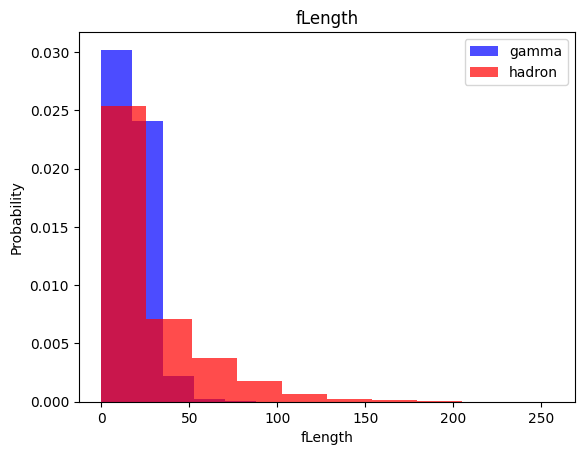

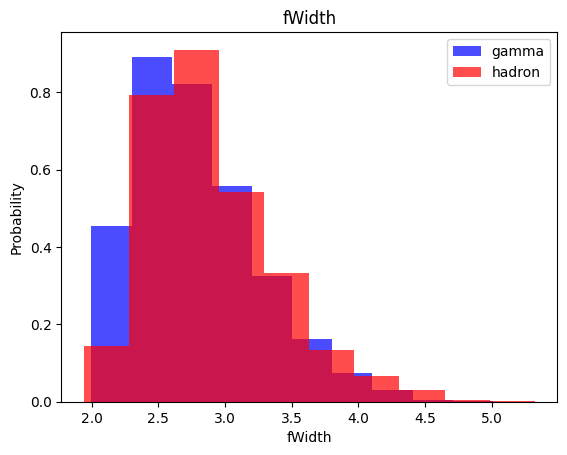

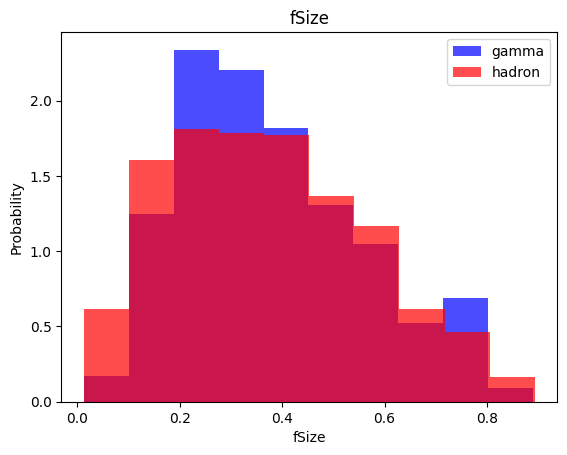

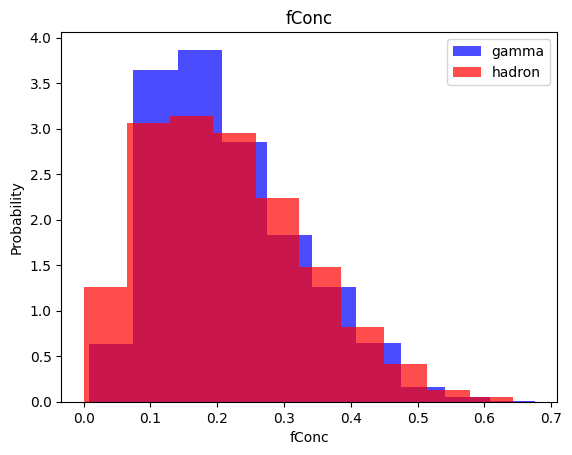

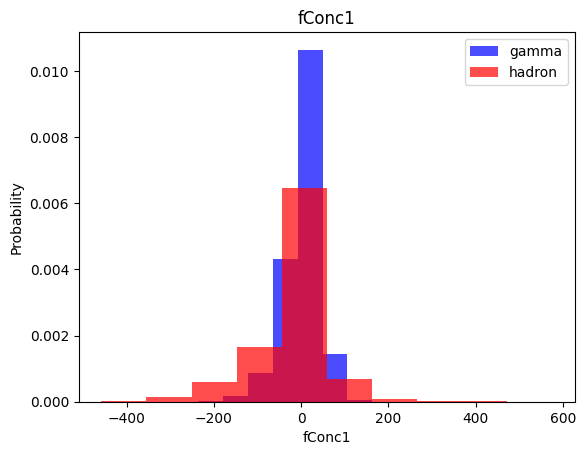

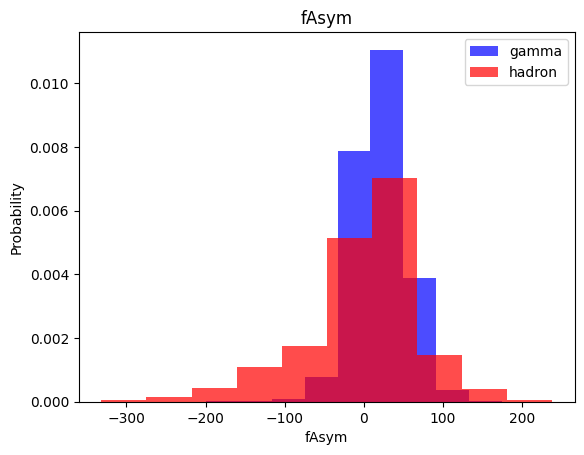

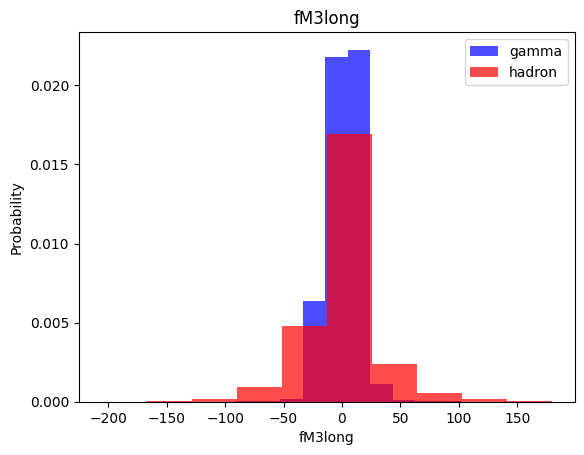

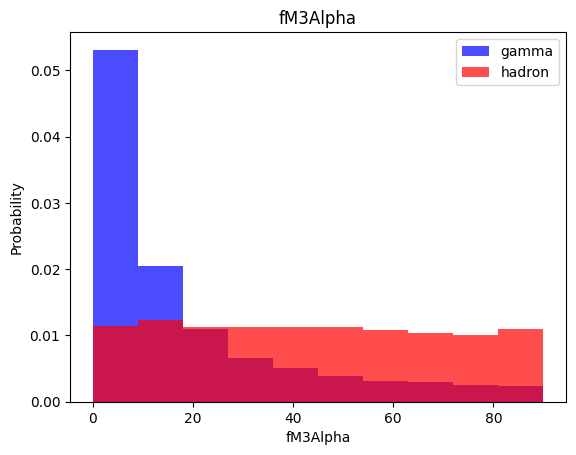

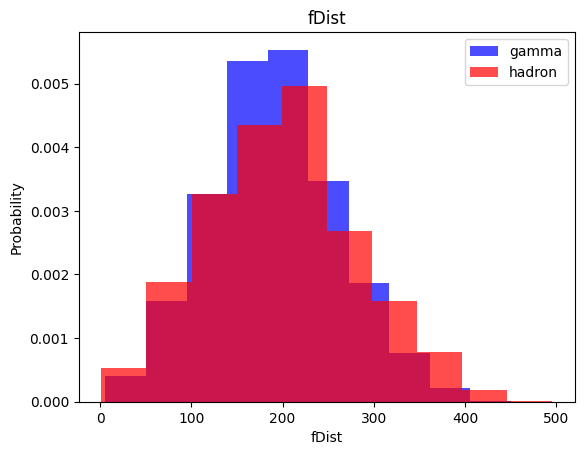

In [7]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [8]:
train, valid, test = np.split(df.sample(frac=1).reset_index(drop=True), [int(0.6 * len(df)), int(0.8 * len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)
  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y

In [10]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Alpha,fDist,class
0,9.7899,2.4518,0.6078,0.3163,-23.9898,-9.4893,-5.2823,1.7684,131.9400,0
1,17.9913,3.1524,0.2626,0.1404,40.7811,32.9045,8.7595,2.5160,199.0980,1
2,19.5469,3.1081,0.2308,0.1314,2.0494,-33.9564,-15.9531,1.1326,236.2770,1
3,9.6415,2.4393,0.4364,0.2491,54.5746,-16.0567,-6.2314,1.8110,185.4060,1
4,25.7886,2.7555,0.2125,0.1168,-28.1016,-30.9838,16.8676,69.0297,146.1010,0
...,...,...,...,...,...,...,...,...,...,...
11407,13.1451,2.8915,0.3055,0.1547,10.6781,-8.0974,-7.1450,0.7060,192.9350,1
11408,16.2751,2.7439,0.3174,0.1776,-24.1711,-29.2344,-9.4621,43.9162,55.2383,1
11409,37.2470,3.6508,0.0976,0.0519,11.6367,134.9300,-28.6922,55.7671,149.2620,0
11410,3.3491,2.3366,0.7506,0.5147,13.8682,19.1110,3.8760,16.6095,87.5802,0


In [11]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)
test,x_test,y_test=scale_dataset(test,oversample=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [12]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred=knn_model.predict(x_test)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1377
           1       0.85      0.86      0.86      2427

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.82      0.82      3804



In [16]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [18]:
y_pred=nb_model.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53      1377
           1       0.73      0.90      0.81      2427

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [22]:
y_pred=lg_model.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69      1377
           1       0.82      0.82      0.82      2427

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.77      0.77      0.77      3804



In [24]:
#SVM
from sklearn.svm import SVC

In [25]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [26]:
y_pred=svm_model.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1377
           1       0.88      0.90      0.89      2427

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [28]:
#Neural Networks
import tensorflow as tf


In [51]:
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(history.history["loss"],label="loss")
  ax1.plot(history.history["val_loss"],label="val_loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Loss")
  ax1.legend()
  ax1.grid(True)
  ax2.plot(history.history["accuracy"],label="accuracy")
  ax2.plot(history.history["val_accuracy"],label="val_accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.grid(True)
  plt.show()
  plot_history(history)

In [52]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation="sigmoid")
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss="binary_crossentropy",metrics=['accuracy'])
  history=nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
  return nn_model,history